# Importações e Carregamento de Dados

In [1]:
# Importações de bibliotecas gerais
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importações do scikit-learn para modelos, métricas e validação cruzada
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold,
    GridSearchCV,
    cross_val_predict
)
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_recall_curve
)
from sklearn.preprocessing import MinMaxScaler

# Importações do LightGBM
import lightgbm as lgb

# Importações do XGBoost
import xgboost as xgb

# Importação do imbalanced-learn para balanceamento de classes
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline

# Configurações adicionais
import warnings
warnings.filterwarnings('ignore')

# Carregando a base de dados
base = pd.read_parquet('dfCleaned.parquet')
base.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
1,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
2,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
3,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
4,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0


## visualização das colunas

In [2]:
base.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

# Análise de correlação
### matriz de correlação

In [3]:
correlation_matrix = base.corr()

# Filtrar apenas as correlações com o target 'DiffWalk'
target_correlation = correlation_matrix["DiffWalk"].sort_values(ascending=False)

print(target_correlation)


DiffWalk                1.000000
PhysHlth                0.467861
GenHlth                 0.442264
MentHlth                0.220960
HeartDiseaseorAttack    0.211268
HighBP                  0.209257
Age                     0.208915
Diabetes_012            0.199677
Stroke                  0.178390
HighChol                0.138773
BMI                     0.135693
Smoker                  0.123734
NoDocbcCost             0.112179
CholCheck               0.038229
AnyHealthcare           0.007112
HvyAlcoholConsump      -0.032321
Fruits                 -0.042569
Sex                    -0.058686
Veggies                -0.076708
Education              -0.186756
PhysActivity           -0.238116
Income                 -0.306169
Name: DiffWalk, dtype: float64


# Normalização das colunas
### função de normalização

In [4]:
from sklearn.preprocessing import MinMaxScaler

def normalizar_coluna(df, nome_coluna):
    # Inicializar o MinMaxScaler
    scaler = MinMaxScaler()
    
    # Selecionar a coluna especificada
    coluna = df[[nome_coluna]]
    
    # Normalizar a coluna
    coluna_normalizada = scaler.fit_transform(coluna)
    
    # Retornar a coluna normalizada
    return coluna_normalizada
normalizar_coluna(base,'GenHlth')
normalizar_coluna(base,'Age')
normalizar_coluna(base,'MentHlth')
normalizar_coluna(base,'PhysHlth')
normalizar_coluna(base,'Income')
normalizar_coluna(base,'Education')
normalizar_coluna(base,'BMI')
normalizar_coluna(base,'Diabetes_012')

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])

# Preparação dos Dados
### Separação de Features e Target

In [5]:
# Removendo colunas com menor correlação e a target
X = base.drop(columns=[
    'AnyHealthcare', 'HvyAlcoholConsump', 'Fruits',
    'Sex', 'Veggies', 'CholCheck', 'DiffWalk'
])
y = base['DiffWalk']


### Visualização da Distribuição da Target

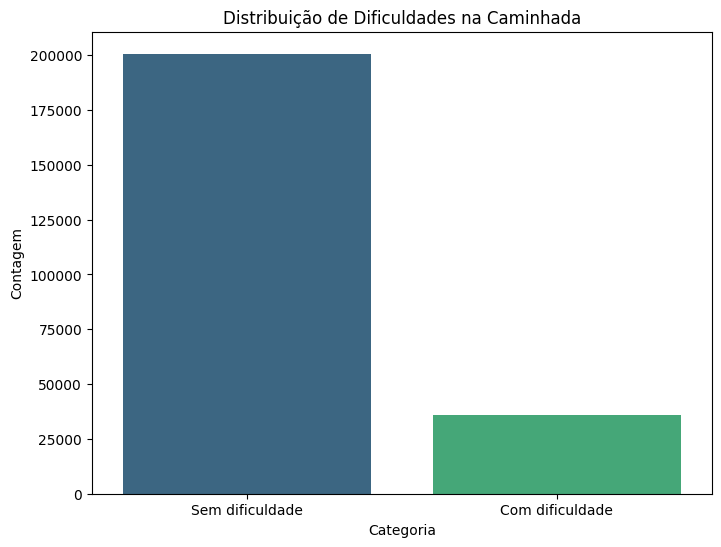

In [6]:
# Mapeando os valores da target para labels descritivos
labels = {0.0: "Sem dificuldade", 1.0: "Com dificuldade"}
y_labels = y.replace(labels)

# Contagem dos valores
value_counts = y_labels.value_counts()

# Plotando gráfico de barras
plt.figure(figsize=(8,6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.title('Distribuição de Dificuldades na Caminhada')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.show()


### Contagem dos Valores da Target

In [7]:
y_labels.value_counts()

DiffWalk
Sem dificuldade    200707
Com dificuldade     35777
Name: count, dtype: int64

# Divisão em Conjuntos de Treino e Teste
### Split dos Dados

In [8]:
# Dividindo os dados em treino e teste com seed 3372 e teste de 20%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=13, stratify=y
)

# Verificando a proporção na base de treino
proporcao_treino = (y_train.value_counts()/y_train.shape[0]) * 100
print(proporcao_treino)

# Usei stratify=y para manter a proporção das classes nos conjuntos de treino e teste.

DiffWalk
0.0    84.871054
1.0    15.128946
Name: count, dtype: float64


### Renomeando os Rótulos das Classes

In [9]:
y_train = y_train.replace({0.0: 'Sem dificuldade', 1.0: 'Com dificuldade'})
y_test = y_test.replace({0.0: 'Sem dificuldade', 1.0: 'Com dificuldade'})


# Balanceamento dos Dados com SMOTEENN
### Aplicando SMOTEENN

Aplicando ADASYN


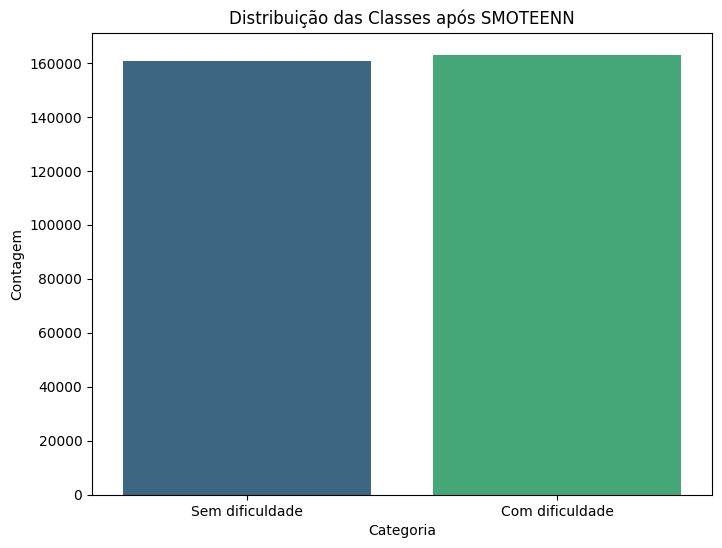

In [10]:
from imblearn.over_sampling import ADASYN
print("Aplicando ADASYN")

# Balanceamento dos dados de treino usando ADASYN
adasyn = ADASYN(random_state=77)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)
'''
from imblearn.combine import SMOTEENN

# Aplicando SMOTEENN para balanceamento
smoteenn = SMOTEENN(random_state=13)
X_resampled, y_resampled = smoteenn.fit_resample(X_train, y_train)
# Distribuição das Classes após SMOTEENN
# Distribuição das Classes após SMOTEENN
# Substituindo os valores de y_resampled pelos labels


# Contagem dos valores após balanceamento e ordenação

'''
y_resampled_labels = y_resampled.replace(labels)
value_counts_resampled = y_resampled_labels.value_counts()
value_counts_resampled = value_counts_resampled.reindex(["Sem dificuldade", "Com dificuldade"])
# Plotando gráfico de barras
plt.figure(figsize=(8,6))
sns.barplot(x=value_counts_resampled.index, y=value_counts_resampled.values, palette='viridis')
plt.title('Distribuição das Classes após SMOTEENN')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.show()




In [11]:
### Verificando a Distribuição Balanceada

In [12]:
y_resampled.value_counts()

DiffWalk
Com dificuldade    163051
Sem dificuldade    160565
Name: count, dtype: int64

# Modelagem
A seguir, implementaremos diversos modelos de classificação nos cenários desbalanceado e balanceado, incluindo o novo modelo solicitado, XGBoost.

# K-Nearest Neighbors (KNN)
## KNN - Desbalanceado
### Treinamento e Avaliação no Conjunto Desbalanceado

In [13]:
# Treinando o modelo KNN no conjunto desbalanceado
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred_knn = knn.predict(X_test)

# Avaliação do modelo
print("Desempenho do KNN no conjunto desbalanceado:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_knn):.2f}")
print(classification_report(y_test, y_pred_knn))


Desempenho do KNN no conjunto desbalanceado:
Acurácia: 0.87
                 precision    recall  f1-score   support

Com dificuldade       0.60      0.42      0.50      7155
Sem dificuldade       0.90      0.95      0.93     40142

       accuracy                           0.87     47297
      macro avg       0.75      0.69      0.71     47297
   weighted avg       0.86      0.87      0.86     47297



## KNN - Balanceado
### Treinamento e Avaliação no Conjunto Balanceado

Desempenho do KNN no conjunto de treino balanceado:
Acurácia: 0.90
                 precision    recall  f1-score   support

Com dificuldade       0.84      0.99      0.91    163051
Sem dificuldade       0.99      0.81      0.89    160565

       accuracy                           0.90    323616
      macro avg       0.91      0.90      0.90    323616
   weighted avg       0.91      0.90      0.90    323616



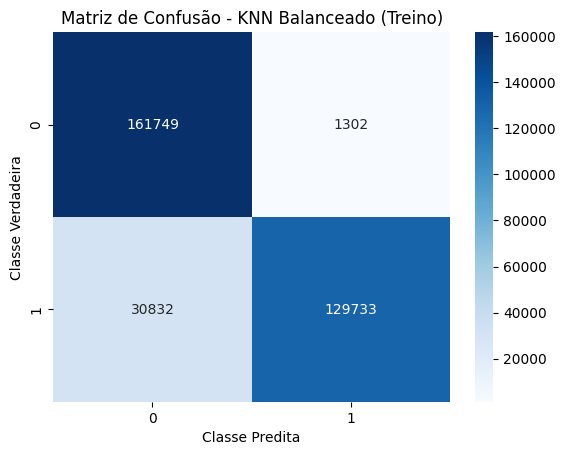

In [14]:
# Treinando o modelo KNN no conjunto balanceado
knn_balanced = KNeighborsClassifier(n_neighbors=5)
knn_balanced.fit(X_resampled, y_resampled)

# Avaliação do modelo no conjunto de treino
y_pred_train_knn_balanced = knn_balanced.predict(X_resampled)

print("Desempenho do KNN no conjunto de treino balanceado:")
print(f"Acurácia: {accuracy_score(y_resampled, y_pred_train_knn_balanced):.2f}")
print(classification_report(y_resampled, y_pred_train_knn_balanced))

# Matriz de confusão - Conjunto de treino
conf_matrix_train = confusion_matrix(y_resampled, y_pred_train_knn_balanced)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - KNN Balanceado (Treino)')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()


Desempenho do KNN no conjunto balanceado:
Acurácia: 0.75
                 precision    recall  f1-score   support

Com dificuldade       0.35      0.75      0.48      7155
Sem dificuldade       0.94      0.75      0.84     40142

       accuracy                           0.75     47297
      macro avg       0.65      0.75      0.66     47297
   weighted avg       0.85      0.75      0.78     47297



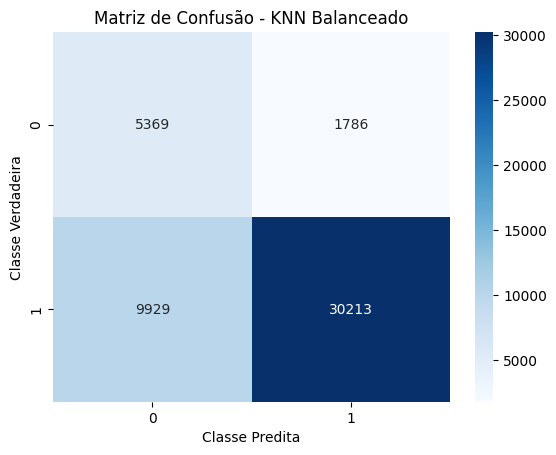

In [15]:
# Treinando o modelo KNN no conjunto balanceado
knn_balanced = KNeighborsClassifier(n_neighbors=5)
knn_balanced.fit(X_resampled, y_resampled)

# Previsões no conjunto de teste
y_pred_knn_balanced = knn_balanced.predict(X_test)

# Avaliação do modelo
print("Desempenho do KNN no conjunto balanceado:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_knn_balanced):.2f}")
print(classification_report(y_test, y_pred_knn_balanced))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_knn_balanced)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - KNN Balanceado')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()


# Naive Bayes
## Naive Bayes - Desbalanceado
### Treinamento e Avaliação no Conjunto Desbalanceado

In [17]:
# Treinando o modelo Naive Bayes no conjunto desbalanceado
nb = GaussianNB()
nb.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred_nb = nb.predict(X_test)

# Avaliação do modelo
print("Desempenho do Naive Bayes no conjunto desbalanceado:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_nb):.2f}")
print(classification_report(y_test, y_pred_nb))


Desempenho do Naive Bayes no conjunto desbalanceado:
Acurácia: 0.84
                 precision    recall  f1-score   support

Com dificuldade       0.47      0.65      0.55      7155
Sem dificuldade       0.93      0.87      0.90     40142

       accuracy                           0.84     47297
      macro avg       0.70      0.76      0.72     47297
   weighted avg       0.86      0.84      0.85     47297



## Naive Bayes - Balanceado
### Treinamento e Avaliação no Conjunto Balanceado

Desempenho do Naive Bayes no conjunto de treino balanceado:
Acurácia: 0.73
                 precision    recall  f1-score   support

Com dificuldade       0.77      0.66      0.71    163051
Sem dificuldade       0.70      0.80      0.74    160565

       accuracy                           0.73    323616
      macro avg       0.73      0.73      0.73    323616
   weighted avg       0.73      0.73      0.73    323616



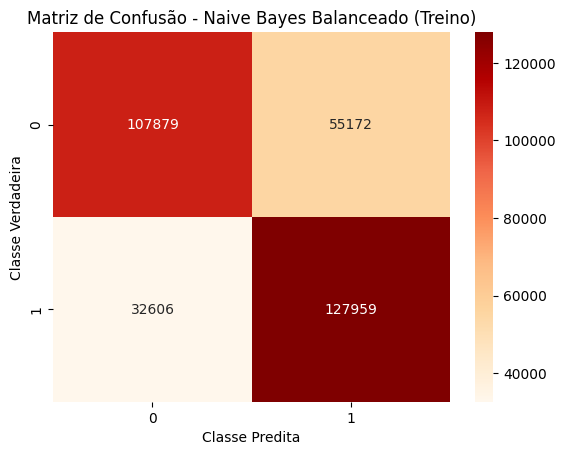

In [18]:
# Treinando o modelo Naive Bayes no conjunto balanceado
nb_balanced = GaussianNB()
nb_balanced.fit(X_resampled, y_resampled)

# Avaliação do modelo no conjunto de treino
y_pred_train_nb_balanced = nb_balanced.predict(X_resampled)

print("Desempenho do Naive Bayes no conjunto de treino balanceado:")
print(f"Acurácia: {accuracy_score(y_resampled, y_pred_train_nb_balanced):.2f}")
print(classification_report(y_resampled, y_pred_train_nb_balanced))

# Matriz de confusão - Conjunto de treino
conf_matrix_train = confusion_matrix(y_resampled, y_pred_train_nb_balanced)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='OrRd')
plt.title('Matriz de Confusão - Naive Bayes Balanceado (Treino)')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()


Desempenho do Naive Bayes no conjunto balanceado:
Acurácia: 0.79
                 precision    recall  f1-score   support

Com dificuldade       0.40      0.76      0.53      7155
Sem dificuldade       0.95      0.80      0.87     40142

       accuracy                           0.79     47297
      macro avg       0.68      0.78      0.70     47297
   weighted avg       0.87      0.79      0.82     47297



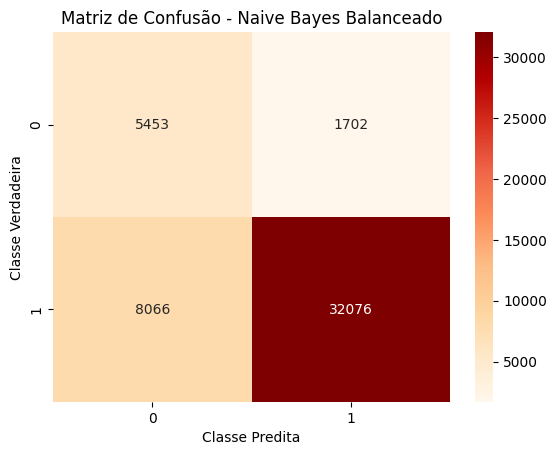

In [19]:
# Treinando o modelo Naive Bayes no conjunto balanceado
nb_balanced = GaussianNB()
nb_balanced.fit(X_resampled, y_resampled)

# Previsões no conjunto de teste
y_pred_nb_balanced = nb_balanced.predict(X_test)

# Avaliação do modelo
print("Desempenho do Naive Bayes no conjunto balanceado:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_nb_balanced):.2f}")
print(classification_report(y_test, y_pred_nb_balanced))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_nb_balanced)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='OrRd')
plt.title('Matriz de Confusão - Naive Bayes Balanceado')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()


# Random Forest
## Random Forest - Desbalanceado
### Treinamento e Avaliação no Conjunto Desbalanceado

In [20]:
# Treinando o modelo Random Forest no conjunto desbalanceado
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=13
)
rf.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred_rf = rf.predict(X_test)

# Avaliação do modelo
print("Desempenho do Random Forest no conjunto desbalanceado:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf):.2f}")
print(classification_report(y_test, y_pred_rf))


Desempenho do Random Forest no conjunto desbalanceado:
Acurácia: 0.88
                 precision    recall  f1-score   support

Com dificuldade       0.62      0.46      0.53      7155
Sem dificuldade       0.91      0.95      0.93     40142

       accuracy                           0.88     47297
      macro avg       0.77      0.70      0.73     47297
   weighted avg       0.86      0.88      0.87     47297



In [21]:

# Definindo o modelo ajustado para reduzir overfitting
rf = RandomForestClassifier(
    random_state=13,
    n_estimators=100
)


# Gerando previsões com validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
y_pred = cross_val_predict(rf, X_train, y_train, cv=cv)

# Relatório de classificação após a validação cruzada
print("Classification Report (Validação Cruzada):")
print(classification_report(y_train, y_pred))


Classification Report (Validação Cruzada):
                 precision    recall  f1-score   support

Com dificuldade       0.64      0.46      0.54     28622
Sem dificuldade       0.91      0.95      0.93    160565

       accuracy                           0.88    189187
      macro avg       0.77      0.71      0.73    189187
   weighted avg       0.87      0.88      0.87    189187



# Random Forest - Balanceado
### Treinamento e Avaliação no Conjunto Balanceado

Desempenho do Random Forest no conjunto de treino balanceado:
Acurácia: 0.90
                 precision    recall  f1-score   support

Com dificuldade       0.90      0.90      0.90    163051
Sem dificuldade       0.90      0.89      0.90    160565

       accuracy                           0.90    323616
      macro avg       0.90      0.90      0.90    323616
   weighted avg       0.90      0.90      0.90    323616



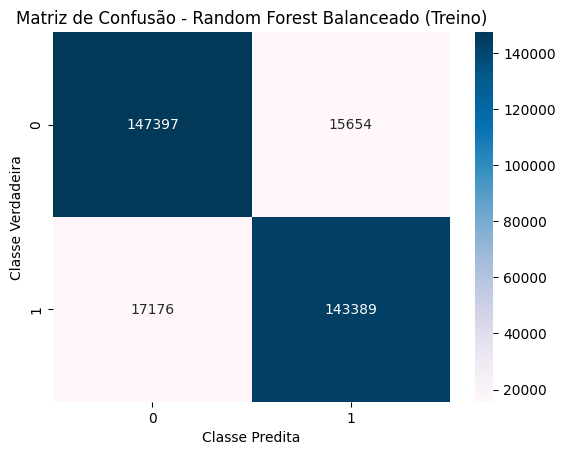

In [22]:
# Treinando o modelo Random Forest no conjunto balanceado com ajuste de hiperparâmetros
rf_balanced = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,  # Limitar a profundidade máxima das árvores
    min_samples_split=10,  # Aumentar o número mínimo de amostras necessárias para dividir um nó
    min_samples_leaf=5,  # Aumentar o número mínimo de amostras em uma folha
    max_features='sqrt',
)
rf_balanced.fit(X_resampled, y_resampled)

# Avaliação do modelo no conjunto de treino
y_pred_train_rf_balanced = rf_balanced.predict(X_resampled)

print("Desempenho do Random Forest no conjunto de treino balanceado:")
print(f"Acurácia: {accuracy_score(y_resampled, y_pred_train_rf_balanced):.2f}")
print(classification_report(y_resampled, y_pred_train_rf_balanced))

# Matriz de confusão - Conjunto de treino
conf_matrix_train = confusion_matrix(y_resampled, y_pred_train_rf_balanced)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='PuBu')
plt.title('Matriz de Confusão - Random Forest Balanceado (Treino)')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()


Desempenho do Random Forest no conjunto de teste:
Acurácia: 0.86
                 precision    recall  f1-score   support

Com dificuldade       0.52      0.65      0.58      7155
Sem dificuldade       0.94      0.89      0.91     40142

       accuracy                           0.86     47297
      macro avg       0.73      0.77      0.74     47297
   weighted avg       0.87      0.86      0.86     47297



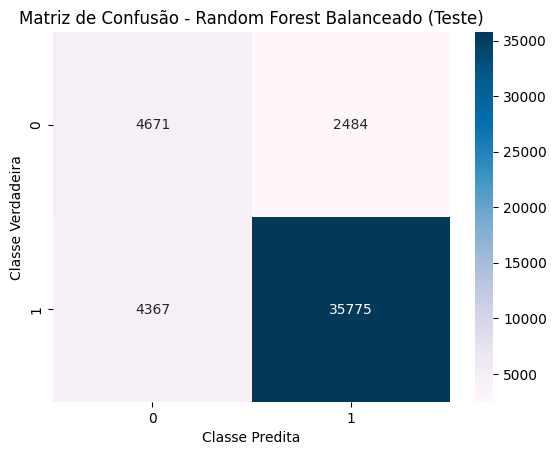

In [23]:
# Previsões no conjunto de teste
y_pred_rf_balanced = rf_balanced.predict(X_test)

# Avaliação do modelo no conjunto de teste
print("Desempenho do Random Forest no conjunto de teste:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf_balanced):.2f}")
print(classification_report(y_test, y_pred_rf_balanced))

# Matriz de confusão - Conjunto de teste
conf_matrix_test = confusion_matrix(y_test, y_pred_rf_balanced)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='PuBu')
plt.title('Matriz de Confusão - Random Forest Balanceado (Teste)')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()


# LightGBM
## LightGBM - Desbalanceado
### Treinamento e Avaliação no Conjunto Desbalanceado

In [24]:
# Treinando o modelo LightGBM no conjunto desbalanceado
lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=3372
)
lgb_model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred_lgb = lgb_model.predict(X_test)

# Avaliação do modelo
print("Desempenho do LightGBM no conjunto desbalanceado:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_lgb):.2f}")
print(classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 160565, number of negative: 28622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 138
[LightGBM] [Info] Number of data points in the train set: 189187, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.848711 -> initscore=1.724523
[LightGBM] [Info] Start training from score 1.724523
Desempenho do LightGBM no conjunto desbalanceado:
Acurácia: 0.89
                 precision    recall  f1-score   support

Com dificuldade       0.68      0.47      0.56      7155
Sem dificuldade       0.91      0.96      0.93     40142

       accuracy                           0.89     47297
      macro avg       0.80      0.72      0.75     47297
   weighted avg       0.88      0.89      0.88     47297



## LightGBM - Balanceado
### Treinamento e Avaliação no Conjunto Balanceado

[LightGBM] [Info] Number of positive: 160565, number of negative: 163051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 323616, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Desempenho do LightGBM no conjunto de treino balanceado:
Acurácia: 0.93
                 precision    recall  f1-score   support

Com dificuldade       0.96      0.90      0.93    163051
Sem dificuldade       0.91      0.96      0.93    160565

       accuracy                           0.93    323616
      macro avg       0.93      0.93      0.93    323616
   weighted avg       0.93      0.93      0.93    323616



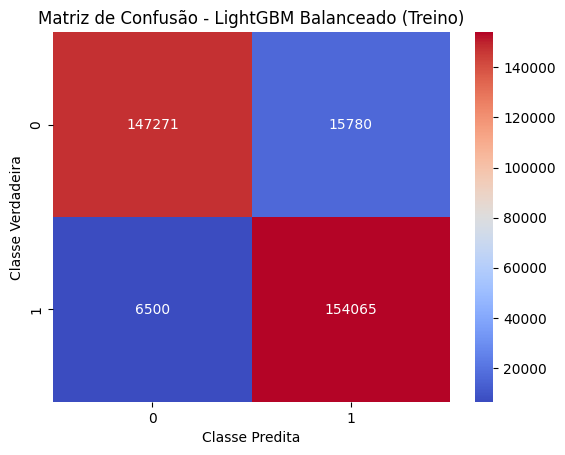

Desempenho do LightGBM no conjunto de teste:
Acurácia: 0.89
                 precision    recall  f1-score   support

Com dificuldade       0.67      0.48      0.56      7155
Sem dificuldade       0.91      0.96      0.93     40142

       accuracy                           0.89     47297
      macro avg       0.79      0.72      0.75     47297
   weighted avg       0.88      0.89      0.88     47297



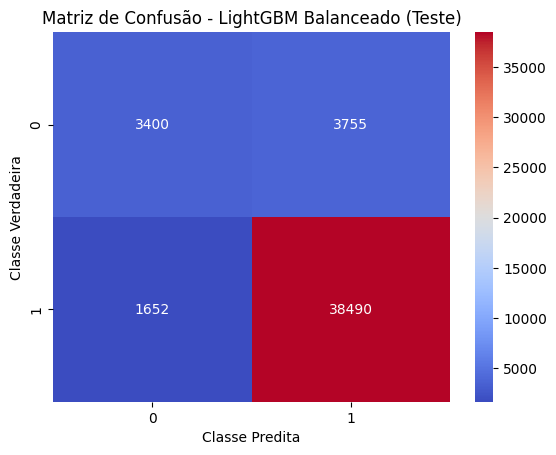

In [25]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definindo o modelo LightGBM com parâmetros ajustados
lgb_model_balanced = lgb.LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=15,
    random_state=13,
    class_weight='balanced'
)

# Treinando o modelo LightGBM no conjunto balanceado
lgb_model_balanced.fit(X_resampled, y_resampled)

# Previsões no conjunto de treino
y_pred_train_lgb = lgb_model_balanced.predict(X_resampled)

# Avaliação do modelo no conjunto de treino
print("Desempenho do LightGBM no conjunto de treino balanceado:")
print(f"Acurácia: {accuracy_score(y_resampled, y_pred_train_lgb):.2f}")
print(classification_report(y_resampled, y_pred_train_lgb))

# Matriz de confusão - Conjunto de treino
conf_matrix_train = confusion_matrix(y_resampled, y_pred_train_lgb)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='coolwarm')
plt.title('Matriz de Confusão - LightGBM Balanceado (Treino)')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()

# Previsões no conjunto de teste
y_pred_lgb_balanced = lgb_model_balanced.predict(X_test)

# Avaliação do modelo no conjunto de teste
print("Desempenho do LightGBM no conjunto de teste:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_lgb_balanced):.2f}")
print(classification_report(y_test, y_pred_lgb_balanced))

# Matriz de confusão - Conjunto de teste
conf_matrix_test = confusion_matrix(y_test, y_pred_lgb_balanced)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='coolwarm')
plt.title('Matriz de Confusão - LightGBM Balanceado (Teste)')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()


# XGBoost
## XGBoost - Desbalanceado
### Treinamento e Avaliação no Conjunto Desbalanceado

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Inicializando o LabelEncoder
label_encoder = LabelEncoder()

# Convertendo as classes para valores numéricos
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Treinando o modelo XGBoost no conjunto desbalanceado com as classes convertidas
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=13,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train_encoded)

# Previsões no conjunto de teste
y_pred_xgb = xgb_model.predict(X_test)

# Avaliação do modelo
print("Desempenho do XGBoost no conjunto de teste desbalanceados:")
print(f"Acurácia: {accuracy_score(y_test_encoded, y_pred_xgb):.2f}")
print(classification_report(y_test_encoded, y_pred_xgb, target_names=label_encoder.classes_))


Desempenho do XGBoost no conjunto de teste desbalanceados:
Acurácia: 0.89
                 precision    recall  f1-score   support

Com dificuldade       0.68      0.47      0.56      7155
Sem dificuldade       0.91      0.96      0.93     40142

       accuracy                           0.89     47297
      macro avg       0.80      0.72      0.75     47297
   weighted avg       0.88      0.89      0.88     47297



## XGBoost - Balanceado
### Treinamento e Avaliação no Conjunto Balanceado

Desempenho do XGBoost no conjunto de treino balanceado:
Acurácia: 0.90
                 precision    recall  f1-score   support

Com dificuldade       0.89      0.91      0.90    163051
Sem dificuldade       0.91      0.89      0.90    160565

       accuracy                           0.90    323616
      macro avg       0.90      0.90      0.90    323616
   weighted avg       0.90      0.90      0.90    323616



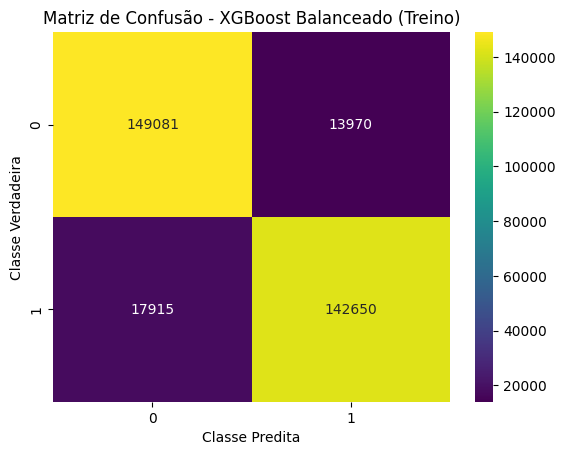

Desempenho do XGBoost no conjunto de teste:
Acurácia: 0.85
                 precision    recall  f1-score   support

Com dificuldade       0.52      0.67      0.58      7155
Sem dificuldade       0.94      0.89      0.91     40142

       accuracy                           0.85     47297
      macro avg       0.73      0.78      0.75     47297
   weighted avg       0.87      0.85      0.86     47297



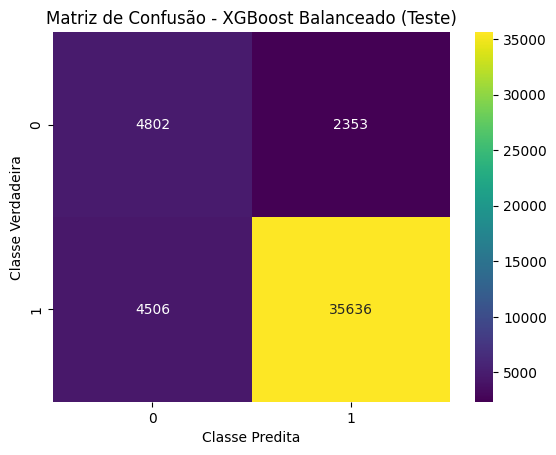

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

# Inicializando o LabelEncoder
label_encoder = LabelEncoder()

# Convertendo as classes para valores numéricos
y_resampled_encoded = label_encoder.fit_transform(y_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Treinando o modelo XGBoost no conjunto balanceado com as classes convertidas
xgb_model_balanced = xgb.XGBClassifier(
    random_state=13,
    max_depth=4,
    min_child_weight=3,        
    gamma=0.3,                 
    subsample=0.8,
    colsample_bytree=0.8,
    learning_rate=0.05,        
    n_estimators=100,          
    reg_alpha=0.01,
    reg_lambda=0.1,
    scale_pos_weight=0.8,      
    early_stopping_rounds=10,
    eval_metric="logloss"
)

# Adicionando o conjunto de validação
eval_set = [(X_resampled, y_resampled_encoded), (X_test, y_test_encoded)]

xgb_model_balanced.fit(
    X_resampled, 
    y_resampled_encoded, 
    eval_set=eval_set,
    verbose=False  # Define como False para evitar muitas saídas durante o treinamento
)

# Previsões no conjunto de treino
y_pred_train_xgb_balanced = xgb_model_balanced.predict(X_resampled)

# Avaliação do modelo no conjunto de treino
print("Desempenho do XGBoost no conjunto de treino balanceado:")
print(f"Acurácia: {accuracy_score(y_resampled_encoded, y_pred_train_xgb_balanced):.2f}")
print(classification_report(y_resampled_encoded, y_pred_train_xgb_balanced, target_names=label_encoder.classes_))

# Matriz de confusão - Conjunto de treino
conf_matrix_train = confusion_matrix(y_resampled_encoded, y_pred_train_xgb_balanced)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='viridis')
plt.title('Matriz de Confusão - XGBoost Balanceado (Treino)')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()

# Previsões no conjunto de teste
y_pred_xgb_balanced = xgb_model_balanced.predict(X_test)

# Avaliação do modelo no conjunto de teste
print("Desempenho do XGBoost no conjunto de teste:")
print(f"Acurácia: {accuracy_score(y_test_encoded, y_pred_xgb_balanced):.2f}")
print(classification_report(y_test_encoded, y_pred_xgb_balanced, target_names=label_encoder.classes_))

# Matriz de confusão - Conjunto de teste
conf_matrix_test = confusion_matrix(y_test_encoded, y_pred_xgb_balanced)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='viridis')
plt.title('Matriz de Confusão - XGBoost Balanceado (Teste)')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()


### fim :D